In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential  # for all deep learning neural network
from keras.layers import Dense #for hidden layer
from keras.layers import LeakyReLU,PReLU,ELU # for Activation function
from keras. layers import Dropout  # to avoid overfittin---> if neural network is too deep we usually used this


In [2]:
#Import data set
dataset= pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X= dataset.iloc[:,3:-1]
y=dataset.iloc[:,-1]
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [4]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender= pd.get_dummies(X['Gender'],drop_first=True)

In [5]:
# concat
X=pd.concat([X,geography,gender],axis=1)
# Dropping
X.drop(['Geography','Gender'],axis=1,inplace=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [6]:
#splitting into training and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [7]:
# Feature scalling is must to converage will happen quickly

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [8]:
# Initialising the ANN
classifier= Sequential()

In [9]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
# Adding the second hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

# Adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# compiling ANN
classifier.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
#fitting the ANN to the training set
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.4946 - accuracy: 0.7891 - val_loss: 0.4749 - val_accuracy: 0.7963
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4617 - accuracy: 0.7962 - val_loss: 0.4599 - val_accuracy: 0.7959
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4506 - accuracy: 0.7962 - val_loss: 0.4516 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4430 - accuracy: 0.7962 - val_loss: 0.4462 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4369 - accuracy: 0.7962 - val_loss: 0.4413 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4326 - accuracy: 0.7964 - val_loss: 0.4375 - val_accuracy: 0.7952
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4289 - accuracy: 0.8001 - val_loss: 0.4348 - val_accuracy: 0.8088

In [12]:
# predicting the model
y_pred= classifier.predict(X_test)
y_pred= (y_pred>0.5)
y_pred

63/63 [==============================] - 0s 915us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

cm= confusion_matrix(y_test,y_pred)
print(cm)
accuracy=accuracy_score(y_test,y_pred)
print('The accuracy of the model is',accuracy)
cl_report = classification_report(y_test,y_pred)
print(cl_report)

[[1501   94]
 [ 193  212]]
The accuracy of the model is 0.8565
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1595
           1       0.69      0.52      0.60       405

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


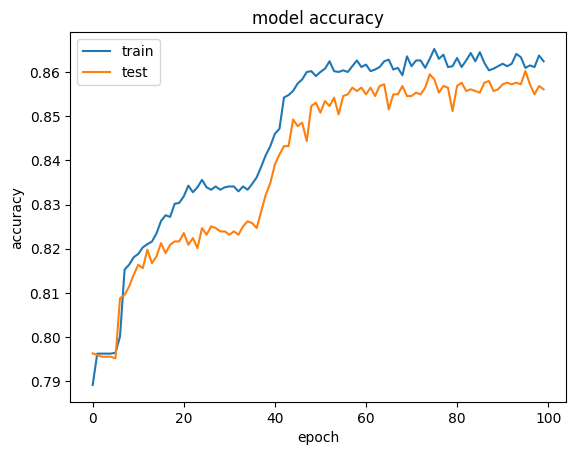

In [16]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()